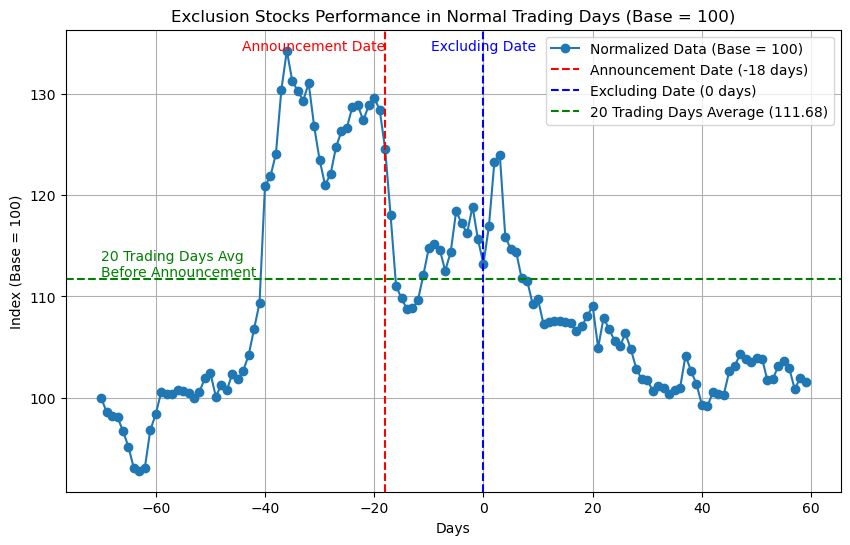

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data from the Excel file
file_path = 'Exclusion Stocks in Normal Trading Days_1.xlsx'  # File name as provided
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust sheet_name if necessary

# Clean and filter the data for the relevant columns
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Normalize the index to set the first day's value to 100
first_day_index = cleaned_data['Index'].iloc[0]
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Plot the price change diagram
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.title('Exclusion Stocks Performance in Normal Trading Days (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')

# Add vertical lines and annotations for special days
plt.axvline(x=-18, color='red', linestyle='--', label='Announcement Date (-18 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Excluding Date (0 days)')
plt.text(-18, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Excluding Date', color='blue', fontsize=10, ha='center')

# Add horizontal dashed line for 20 trading days average before announcement
average_value = 13.4917
normalized_average = (average_value / first_day_index) * 100
plt.axhline(y=normalized_average, color='green', linestyle='--', label=f'20 Trading Days Average ({normalized_average:.2f})')
plt.text(cleaned_data['Days'].min(), normalized_average, '20 Trading Days Avg\nBefore Announcement', 
         color='green', fontsize=10, va='bottom', ha='left')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


Regression Slope: -0.316062
Regression Intercept: 87.592798
R-squared: 0.695884


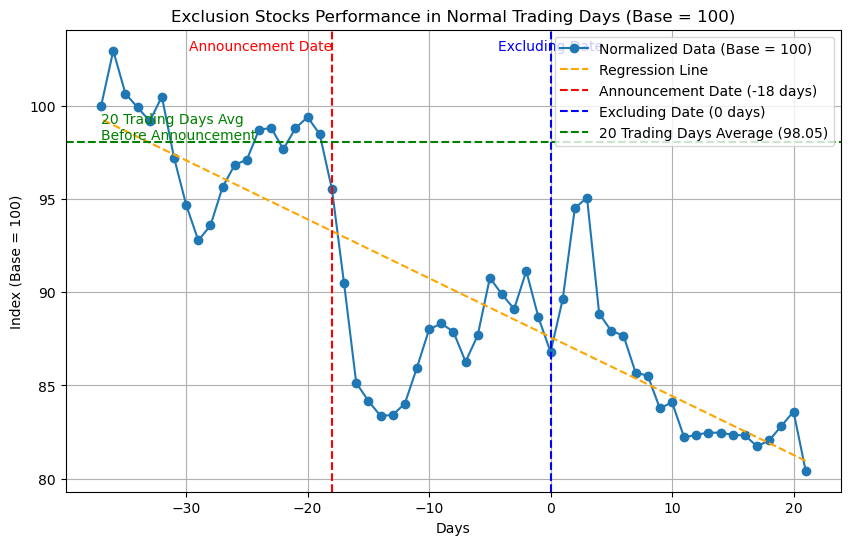

Volatility before -18 days: 0.017559
Volatility from -18 to 0 days: 0.026029
Volatility after 0 days: 0.023396


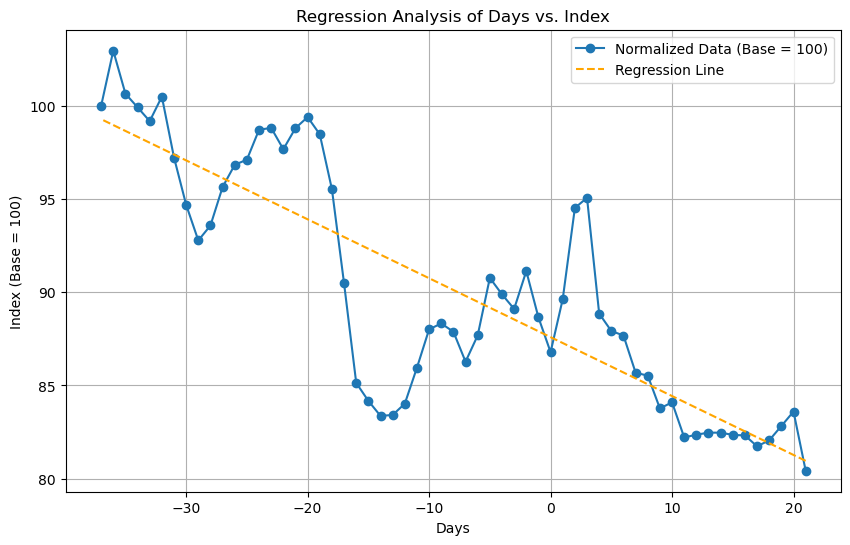

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Import the data from the Excel file
file_path = 'Exclusion Stocks in Normal Trading Days.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust sheet_name if necessary

# Clean and filter the data for the relevant columns
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Find the smallest value in 'Days' and its corresponding index value
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]

# Normalize the index to set the first trading day's value to 100
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Perform linear regression
X = cleaned_data['Days'].values.reshape(-1, 1)  # Independent variable
y = cleaned_data['Index'].values  # Dependent variable

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate regression statistics
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, y_pred)

# Print regression results
print(f"Regression Slope: {slope:.6f}")
print(f"Regression Intercept: {intercept:.6f}")
print(f"R-squared: {r_squared:.6f}")

# Plot the price change diagram
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.title('Exclusion Stocks Performance in Normal Trading Days (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')
plt.plot(cleaned_data['Days'], y_pred, color='orange', linestyle='--', label='Regression Line')


# Add vertical lines and annotations for special days
plt.axvline(x=-18, color='red', linestyle='--', label='Announcement Date (-18 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Excluding Date (0 days)')
plt.text(-18, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Excluding Date', color='blue', fontsize=10, ha='center')

# Add horizontal dashed line for 20 trading days average before announcement
average_value = 15.4515
normalized_average = (average_value / first_day_index) * 100
plt.axhline(y=normalized_average, color='green', linestyle='--', label=f'20 Trading Days Average ({normalized_average:.2f})')
plt.text(cleaned_data['Days'].min(), normalized_average, '20 Trading Days Avg\nBefore Announcement', 
         color='green', fontsize=10, va='bottom', ha='left')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

# Function to calculate volatility (standard deviation of returns)
def calculate_volatility(data, start_day, end_day):
    filtered_data = data[(data['Days'] >= start_day) & (data['Days'] <= end_day)]
    returns = filtered_data['Index'].pct_change().dropna()  # Calculate percentage changes
    return returns.std()  # Standard deviation of returns

# Calculate volatilities
volatility_before_18 = calculate_volatility(cleaned_data, cleaned_data['Days'].min(), -19)
volatility_between_18_0 = calculate_volatility(cleaned_data, -18, 0)
volatility_after_0 = calculate_volatility(cleaned_data, 1, cleaned_data['Days'].max())

# Print the results
print(f"Volatility before -18 days: {volatility_before_18:.6f}")
print(f"Volatility from -18 to 0 days: {volatility_between_18_0:.6f}")
print(f"Volatility after 0 days: {volatility_after_0:.6f}")



# Plot regression results
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.plot(cleaned_data['Days'], y_pred, color='orange', linestyle='--', label='Regression Line')
plt.title('Regression Analysis of Days vs. Index')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')
plt.legend()
plt.grid(True)
plt.show()


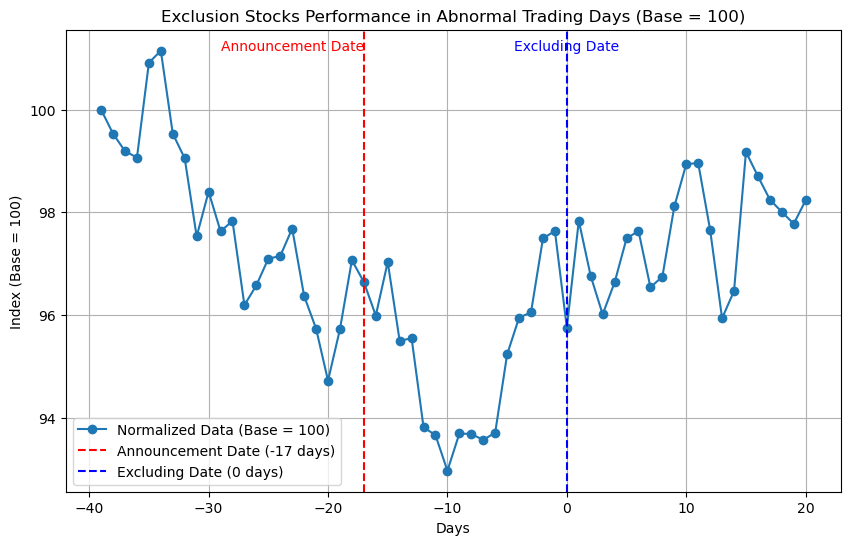

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'Exclusion Stocks in Abnormal Trading Days.xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust 'Sheet1' if the sheet name differs

# Clean and filter the data for the relevant columns
# Ensure 'Days' and 'Index' columns are valid
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Find the smallest value in 'Days' (first trading day) and its corresponding 'Index'
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]

# Normalize the index to set the first trading day's value to 100
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Plot the chart between 'Days' and 'Index'
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.title('Exclusion Stocks Performance in Abnormal Trading Days (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')
plt.grid(True)

# Add vertical lines and annotations for special days
plt.axvline(x=-17, color='red', linestyle='--', label='Announcement Date (-17 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Excluding Date (0 days)')
plt.text(-17, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Excluding Date', color='blue', fontsize=10, ha='center')

# Add legend
plt.legend()

# Display the plot
plt.show()




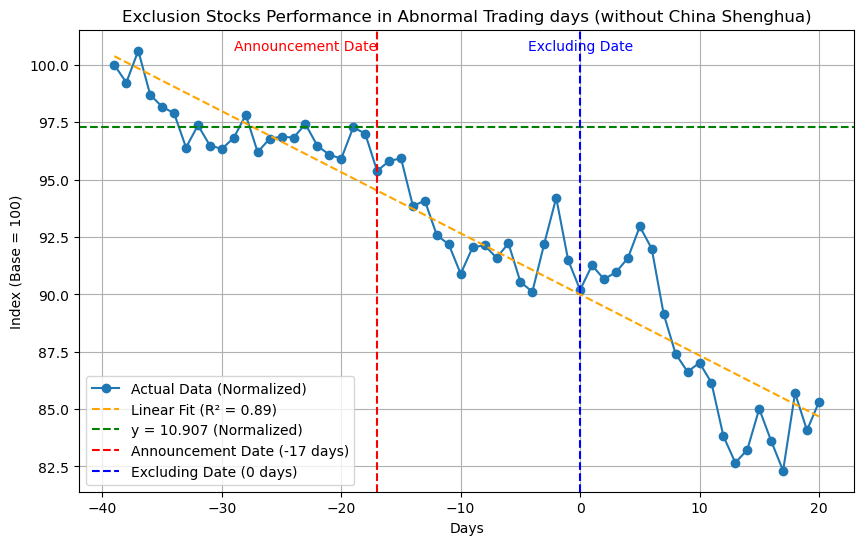

Regression Formula: y = -0.266x + 90.001
Volatility before -17 days: 0.009631
Volatility from -17 to 0 days: 0.014716
Volatility after 0 days: 0.018121


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Define the file path
file_path = 'Exclusion Stocks Performance in Abnormal Trading days (without China Shenghua).xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust 'Sheet1' if the sheet name differs

# Clean and filter the data for the relevant columns
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Normalize the index so the first trading day (smallest 'Days') is 100
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Extract x and y for regression
x = cleaned_data['Days']
y = cleaned_data['Index']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
linear_fit = np.poly1d(coefficients)

# Calculate the fitness (R²)
y_pred = linear_fit(x)
r_squared = r2_score(y, y_pred)

# Plot the chart between 'Days' and 'Index'
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Actual Data (Normalized)')
plt.plot(x, y_pred, color='orange', linestyle='--', label=f'Linear Fit (R² = {r_squared:.2f})')  # Regression line
plt.axhline(y=(10.907 / first_day_index) * 100, color='green', linestyle='--', label=f'y = 10.907 (Normalized)')  # Horizontal line
plt.title('Exclusion Stocks Performance in Abnormal Trading days (without China Shenghua)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')

# Add vertical lines and annotations for special days
plt.axvline(x=-17, color='red', linestyle='--', label='Announcement Date (-17 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Excluding Date (0 days)')
plt.text(-17, y.max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, y.max(), 'Excluding Date', color='blue', fontsize=10, ha='center')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Extract coefficients
slope = np.round(coefficients[0], 3)  # Slope (rounded to 3 significant figures)
intercept = np.round(coefficients[1], 3)  # Intercept (rounded to 3 significant figures)

# Print the regression formula
print(f"Regression Formula: y = {slope}x + {intercept}")

# Calculate volatilities
volatility_before_18 = calculate_volatility(cleaned_data, cleaned_data['Days'].min(), -18)
volatility_between_18_0 = calculate_volatility(cleaned_data, -17, 0)
volatility_after_0 = calculate_volatility(cleaned_data, 1, cleaned_data['Days'].max())

# Print the results
print(f"Volatility before -17 days: {volatility_before_18:.6f}")
print(f"Volatility from -17 to 0 days: {volatility_between_18_0:.6f}")
print(f"Volatility after 0 days: {volatility_after_0:.6f}")


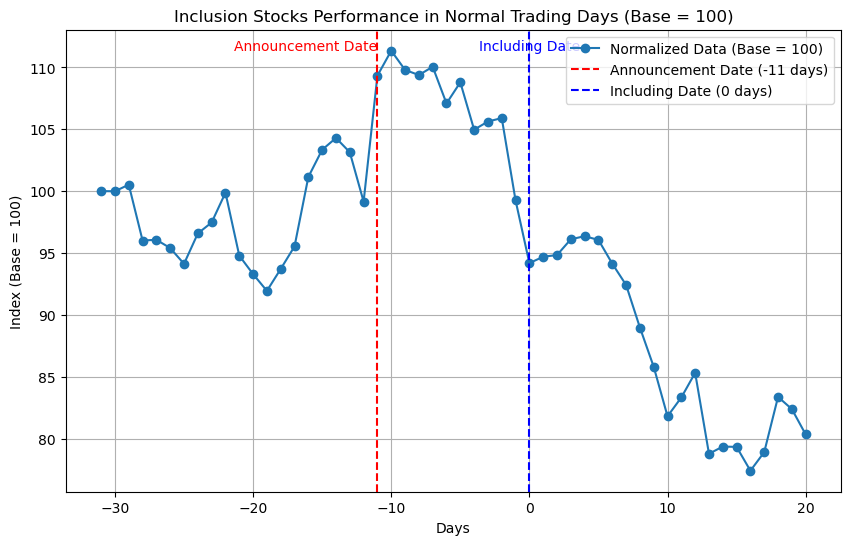

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the uploaded Excel file
file_path = 'Inclusion Stocks Performance in Normal Trading Days.xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust 'Sheet1' if necessary

# Clean and filter the data for the relevant columns
# Ensure 'Days' and 'Index' columns are valid
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Normalize the index so the first trading day (smallest 'Days') is 100
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Plot the chart between 'Days' and 'Index'
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.title('Inclusion Stocks Performance in Normal Trading Days (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')

# Add vertical lines and annotations for special days
plt.axvline(x=-11, color='red', linestyle='--', label='Announcement Date (-11 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Including Date (0 days)')
plt.text(-11, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Including Date', color='blue', fontsize=10, ha='center')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


Regression Formula: y = -0.3160618958068406x + 87.59279781167649


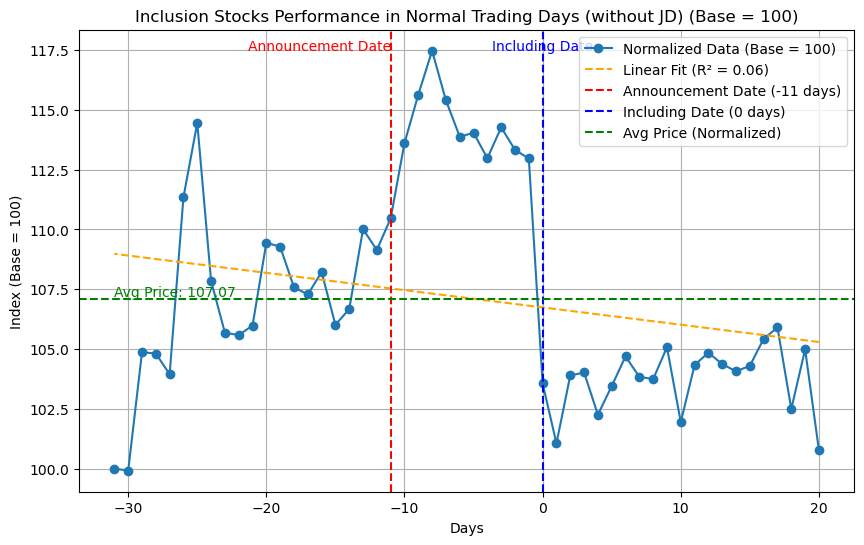

Volatility before -11 days: 0.027312
Volatility from -11 to 0 days: 0.031028
Volatility after 0 days: 0.019189


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the uploaded Excel file
file_path = 'Inclusion Stocks Performance in Normal Trading Days (without JD).xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust 'Sheet1' if necessary

# Clean and filter the data for the relevant columns
# Ensure 'Days' and 'Index' columns are valid
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Normalize the index so the first trading day (smallest 'Days') is 100
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Normalize the average price
average_price = 82.8148327
normalized_average_price = (average_price / first_day_index) * 100

# Extract x and y for regression
x = cleaned_data['Days']
y = cleaned_data['Index']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
linear_fit = np.poly1d(coefficients)

# Calculate the fitness (R²)
y_pred = linear_fit(x)
r_squared = r2_score(y, y_pred)
# Print the regression formula
print(f"Regression Formula: y = {slope}x + {intercept}")

# Plot the chart between 'Days' and 'Index'
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.plot(x, y_pred, color='orange', linestyle='--', label=f'Linear Fit (R² = {r_squared:.2f})')  # Regression line

plt.title('Inclusion Stocks Performance in Normal Trading Days (without JD) (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')

# Add vertical lines and annotations for special days
plt.axvline(x=-11, color='red', linestyle='--', label='Announcement Date (-11 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Including Date (0 days)')
plt.text(-11, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Including Date', color='blue', fontsize=10, ha='center')

# Add a horizontal dashed line for the average price
plt.axhline(y=normalized_average_price, color='green', linestyle='--', label=f'Avg Price (Normalized)')
plt.text(cleaned_data['Days'].min(), normalized_average_price, f'Avg Price: {normalized_average_price:.2f}', 
         color='green', fontsize=10, va='bottom', ha='left')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Calculate volatilities
volatility_before_18 = calculate_volatility(cleaned_data, cleaned_data['Days'].min(), -11)
volatility_between_18_0 = calculate_volatility(cleaned_data, -10, 0)
volatility_after_0 = calculate_volatility(cleaned_data, 1, cleaned_data['Days'].max())

# Print the results
print(f"Volatility before -11 days: {volatility_before_18:.6f}")
print(f"Volatility from -11 to 0 days: {volatility_between_18_0:.6f}")
print(f"Volatility after 0 days: {volatility_after_0:.6f}")





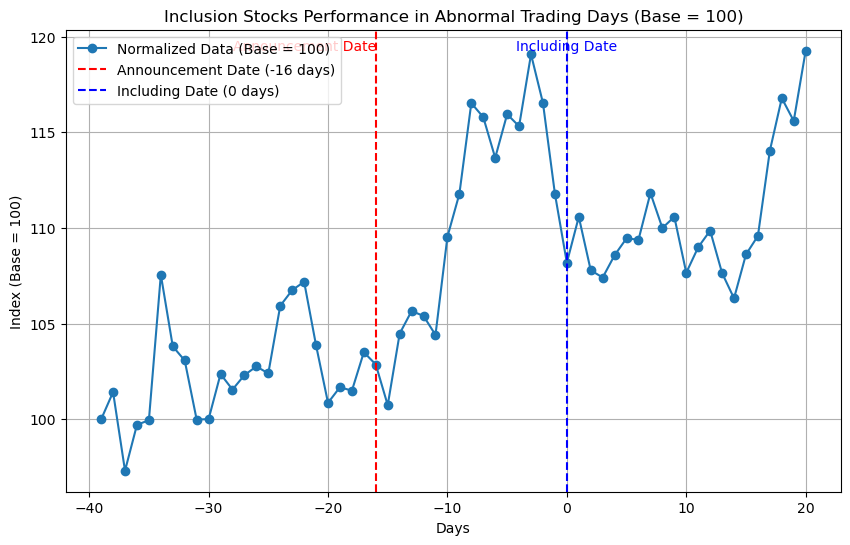

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the uploaded Excel file
file_path = 'Inclusion Stocks Performance in Abnormal Trading Days.xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust 'Sheet1' if necessary

# Clean and filter the data for the relevant columns
# Ensure 'Days' and 'Index' columns are valid
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Normalize the index so the first trading day (smallest 'Days') is 100
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Plot the chart between 'Days' and 'Index'
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Days'], cleaned_data['Index'], marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.title('Inclusion Stocks Performance in Abnormal Trading Days (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')

# Add vertical lines and annotations for special days
plt.axvline(x=-16, color='red', linestyle='--', label='Announcement Date (-16 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Including Date (0 days)')
plt.text(-16, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Including Date', color='blue', fontsize=10, ha='center')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


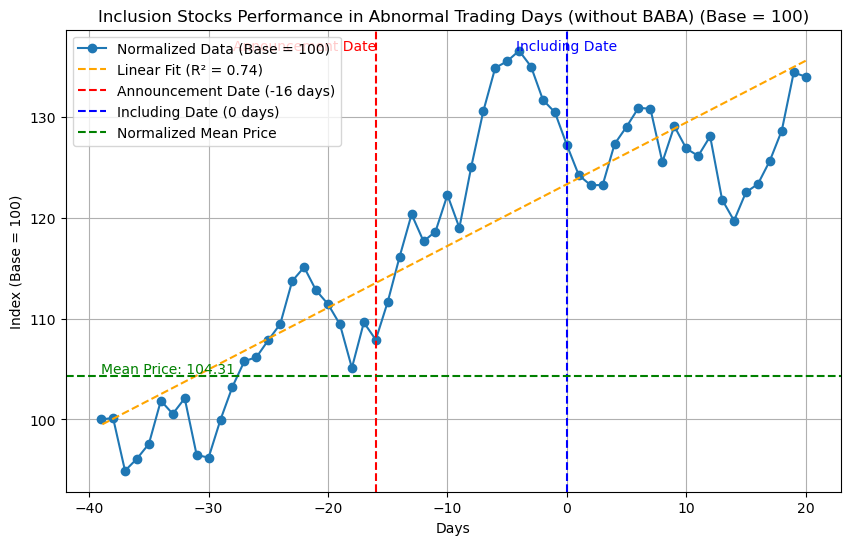

Volatility before -16 days: 0.029230
Volatility from -16 to 0 days: 0.027323
Volatility after 0 days: 0.024208
The regression formula is: y = 0.6117 * x + 123.3148


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Define the file path for the newly uploaded Excel file
file_path = 'Inclusion Stocks Performance in Abormal Trading Days (without BABA).xlsx'

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust 'Sheet1' if necessary

# Clean and filter the data for the relevant columns
cleaned_data = data[['Days', 'Index']].dropna()

# Convert 'Days' to integers and 'Index' to floats for plotting
cleaned_data['Days'] = cleaned_data['Days'].astype(int)
cleaned_data['Index'] = cleaned_data['Index'].astype(float)

# Normalize the index so the first trading day (smallest 'Days') is 100
first_day = cleaned_data['Days'].min()
first_day_index = cleaned_data.loc[cleaned_data['Days'] == first_day, 'Index'].iloc[0]
cleaned_data['Index'] = (cleaned_data['Index'] / first_day_index) * 100

# Normalize the mean price
mean_price = 27.328
normalized_mean_price = (mean_price / first_day_index) * 100

# Extract x and y for regression
x = cleaned_data['Days']
y = cleaned_data['Index']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
linear_fit = np.poly1d(coefficients)

# Calculate the fitness (R²)
y_pred = linear_fit(x)
r_squared = r2_score(y, y_pred)

# Plot the chart between 'Days' and 'Index'
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Normalized Data (Base = 100)')
plt.plot(x, y_pred, color='orange', linestyle='--', label=f'Linear Fit (R² = {r_squared:.2f})')  # Regression line
plt.title('Inclusion Stocks Performance in Abnormal Trading Days (without BABA) (Base = 100)')
plt.xlabel('Days')
plt.ylabel('Index (Base = 100)')

# Add vertical lines and annotations for special days
plt.axvline(x=-16, color='red', linestyle='--', label='Announcement Date (-16 days)')
plt.axvline(x=0, color='blue', linestyle='--', label='Including Date (0 days)')
plt.text(-16, cleaned_data['Index'].max(), 'Announcement Date', color='red', fontsize=10, ha='right')
plt.text(0, cleaned_data['Index'].max(), 'Including Date', color='blue', fontsize=10, ha='center')

# Add normalized mean price line
plt.axhline(y=normalized_mean_price, color='green', linestyle='--', label='Normalized Mean Price')
plt.text(cleaned_data['Days'].min(), normalized_mean_price, f'Mean Price: {normalized_mean_price:.2f}', 
         color='green', fontsize=10, va='bottom', ha='left')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Calculate volatilities
volatility_before_18 = calculate_volatility(cleaned_data, cleaned_data['Days'].min(), -17)
volatility_between_18_0 = calculate_volatility(cleaned_data, -16, 0)
volatility_after_0 = calculate_volatility(cleaned_data, 1, cleaned_data['Days'].max())

# Print the results
print(f"Volatility before -16 days: {volatility_before_18:.6f}")
print(f"Volatility from -16 to 0 days: {volatility_between_18_0:.6f}")
print(f"Volatility after 0 days: {volatility_after_0:.6f}")


slope = coefficients[0]
intercept = coefficients[1]
print(f"The regression formula is: y = {slope:.4f} * x + {intercept:.4f}")




